In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
df = pd.read_pickle('master_econ_env_data_zcta.pkl')

In [4]:
df.head(2)

,Zipcode,AnnualTrend_2000_2021,AnnualTrend_2000_2008,AnnualTrend_2015_2021,min_year,max_year,INTPTLAT,INTPTLONG,ALAND_SQMI,AWATER_SQMI,...,county,state,region,DP04_0046E,DP04_0047E,Owner_Renter_ratio,Median_income,County,GDP_trend,GDP_trend_norm
0,010,0.031272,0.086983,0.053891,2000.0,2021.0,42.269354,-72.567846,1276.131,38.492,...,Hampden,Massachusetts,New England,122666,59881,2.048496,72810.035088,Hampden,-92137.8,-0.004533
1,011,0.031176,0.080476,0.075606,2000.0,2021.0,42.106624,-72.548348,40.946,1.716,...,Hampden,Massachusetts,New England,31343,30622,1.023545,48369.666667,Hampden,-92137.8,-0.004533


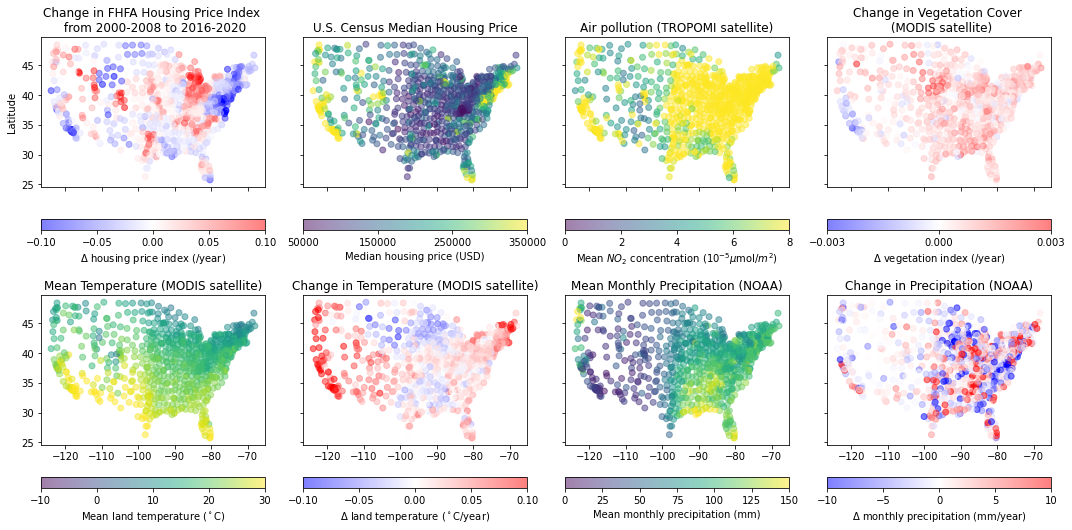

In [5]:
fig, axs=plt.subplots(2,4,sharex=True, sharey=True, )
ax = axs.flat[0]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['AnnualTrend_2015_2021']-df['AnnualTrend_2000_2008'],
          vmin=-0.1,vmax=0.1,cmap='bwr',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='$\Delta$ housing price index (/year)')
ax.set_title('Change in FHFA Housing Price Index \n from 2000-2008 to 2016-2020')
ax.set_ylabel('Latitude')

ax = axs.flat[1]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['DP04_0089E'],
          vmin=5e4,vmax=3.5e5,cmap='viridis',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='Median housing price (USD)',ticks=[5e4,15e4,25e4,35e4])
ax.set_title('U.S. Census Median Housing Price')

ax = axs.flat[2]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=(5e5)*df['NO2_Monthly_AVG'],
          vmin=0,vmax=8,cmap='viridis',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='Mean $NO_2$ concentration ($10^{-5}\mu$mol/$m^2$)')
ax.set_title('Air pollution (TROPOMI satellite)')

ax = axs.flat[3]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['VegInd_AnnualTrend'],
          vmin=-0.003,vmax=0.003,cmap='bwr',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='$\Delta$ vegetation index (/year)',
            ticks = [-0.003,0,0.003])
ax.set_title('Change in Vegetation Cover \n (MODIS satellite)')

ax = axs.flat[4]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['LandTemp_Monthly_AVG'],
          vmin=-10,vmax=30,cmap='viridis',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='Mean land temperature ($^\circ$C)')
ax.set_title('Mean Temperature (MODIS satellite)')

ax = axs.flat[5]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['LandTemp_AnnualTrend'],
          vmin=-0.1,vmax=0.1,cmap='bwr',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='$\Delta$ land temperature ($^\circ$C/year)')
ax.set_title('Change in Temperature (MODIS satellite)')

ax = axs.flat[6]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['Precip_Monthly_AVG'],
          vmin=0,vmax=150,cmap='viridis',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='Mean monthly precipitation (mm)')
ax.set_title('Mean Monthly Precipitation (NOAA)')

ax = axs.flat[7]
hpi = ax.scatter(df['INTPTLONG'], df['INTPTLAT'], c=df['Precip_AnnualTrend'],
          vmin=-10,vmax=10,cmap='bwr',alpha=0.5)
plt.colorbar(hpi,ax=ax,location='bottom',label='$\Delta$ monthly precipitation (mm/year)')
ax.set_title('Change in Precipitation (NOAA)')


fig.set_size_inches(15, 7.5)
fig.tight_layout()